<div style="border:solid Chocolate 2px; padding: 40px">

<b> Сергей, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам специалиста по работе с данными. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Критичные ошибки, которые обязательно нужно исправить.
</div>

    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

# Определение стоимости автомобилей

## Описание проекта

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение, чтобы привлечь новых клиентов. В нём можно будет узнать рыночную стоимость своего автомобиля. 
Постройте модель, которая умеет её определять. В вашем распоряжении данные о технических характеристиках, комплектации и ценах других автомобилей.
Критерии, которые важны заказчику:
* качество предсказания;
* время обучения модели;
* время предсказания модели.

**Набор данных**
* DateCrawled — дата скачивания анкеты из базы
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л. с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* Repaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя

Целевой признак
* Price — цена (евро)

**Цель исследования** 
* Сравнить характеристики моделей: время обучения, время предсказания, точность результата.
* Для оценки качества моделей применить метрику RMSE.
* Значение метрики RMSE должно быть меньше 2500.
* Найти лучшую модель для предсказания стоимости автомобиля.

**Ход исследования**
* Изучить данные. Заполнить пропущенные значения и обработайть аномалии в столбцах. Если среди признаков имеются неинформативные, удалить их.
* Подготовить выборки для обучения моделей.
* Обучить разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробовать разные гиперпараметры.
* Проанализировать время обучения, время предсказания и качество моделей.
* Опираясь на критерии заказчика, выберать лучшую модель, проверить её качество на тестовой выборке.

## Инструменты
* CatBoost
* LightGBM
* Matplotlib
* Numpy
* Pandas
* Scikit learn
* Scipy

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

## Подготовка данных

In [201]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from catboost import CatBoostRegressor
from scipy.stats import randint, uniform
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, OrdinalEncoder, PolynomialFeatures

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Я вижу, исполнение твоего кода начинается в ячейке с номером, который отличается от единицы. Перед отправкой проекта стоит проверять работоспособность кода — это можно сделать, нажав на панели Jupiter Hub ``Kernel`` и ``Restart & Run All`` (см скриншот ниже).

![](https://i.postimg.cc/yd19rYf6/Screenshot-428.png)
        
Важно также убедиться, что все ячейки проекта исполнились - можно просто пролистать работу до конца и убедиться, что последняя ячейка исполнена. Такая проверка поможет тебе убедиться, что твоё решение будет должным образом воспроизведено во время ревью или во время передачи его заказчику - это очень важный этап, пренебрегать которым не стоит:)

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Да, этого не делал из-за того, что в проекте есть ячейки с долгим временем выполнения. Перед отправкой сделаю)
</div>

In [202]:
pth1 = 'autos.csv'
pth2 = '/datasets/autos.csv'
    
if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Данные загрузили.
    
При считывании данных из файла здорово перестраховывать себя от ошибок, связанных, например, с неверным указанием пути к файлу. А иногда бывает, что работаешь с файлом локально, выгружаешь его на сервер, ожидая, что он будет принимать данные, которые лежат на том же сервере, а код падает с ошибкой, потому что путь к файлу не поменялся с локального на серверный.
    
Для этого, например, можно использовать конструкцию `try-except`: сначала пробуешь локальный путь, при возникновении ошибки используется серверный путь (подробнее можешь почитать тут: https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html).
    
Но еще лучше использовать библиотеку `os` - её использование позволит тебе проверять существование указанных директорий (что может быть актуально при одновременной работа на локальном и сетевом окружении) и загружать данные из существующей директории, избегая ошибок. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')

Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)
Также на этапе считывания данных задать индекс-столбец- за это действие отвечает параметр `index_col`.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил, спасибо!
</div>

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [204]:
df.head()

DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
0  2016-03-24 11:52:17    480         NaN              1993  manual      0   
1  2016-03-24 10:58:45  18300       coupe              2011  manual    190   
2  2016-03-14 12:52:21   9800         suv              2004    auto    163   
3  2016-03-17 16:54:04   1500       small              2001  manual     75   
4  2016-03-31 17:25:20   3600       small              2008  manual     69   

   Model  Kilometer  RegistrationMonth  FuelType       Brand Repaired  \
0   golf     150000                  0    petrol  volkswagen      NaN   
1    NaN     125000                  5  gasoline        audi      yes   
2  grand     125000                  8  gasoline        jeep      NaN   
3   golf     150000                  6    petrol  volkswagen       no   
4  fabia      90000                  7  gasoline       skoda       no   

           DateCreated  NumberOfPictures  PostalCode             LastSeen  
0  2016-03-24 00:00:00                 0       70435  2016-04-07 03:16:57  
1  2016-03-24 00:00:00                 0       66954  2016-04-07 01:46:50  
2  2016-03-14 00:00:00                 0       90480  2016-04-05 12:47:46  
3  2016-03-17 00:00:00                 0       91074  2016-03-17 17:40:17  
4  2016-03-31 00:00:00                 0       60437  2016-04-06 10:17:21

In [205]:
df.describe(include='all')

DateCrawled          Price VehicleType  RegistrationYear  \
count                354369  354369.000000      316879     354369.000000   
unique               271174            NaN           8               NaN   
top     2016-03-24 14:49:47            NaN       sedan               NaN   
freq                      7            NaN       91457               NaN   
mean                    NaN    4416.656776         NaN       2004.234448   
std                     NaN    4514.158514         NaN         90.227958   
min                     NaN       0.000000         NaN       1000.000000   
25%                     NaN    1050.000000         NaN       1999.000000   
50%                     NaN    2700.000000         NaN       2003.000000   
75%                     NaN    6400.000000         NaN       2008.000000   
max                     NaN   20000.000000         NaN       9999.000000   

       Gearbox          Power   Model      Kilometer  RegistrationMonth  \
count   334536  354369.000000  334664  354369.000000      354369.000000   
unique       2            NaN     250            NaN                NaN   
top     manual            NaN    golf            NaN                NaN   
freq    268251            NaN   29232            NaN                NaN   
mean       NaN     110.094337     NaN  128211.172535           5.714645   
std        NaN     189.850405     NaN   37905.341530           3.726421   
min        NaN       0.000000     NaN    5000.000000           0.000000   
25%        NaN      69.000000     NaN  125000.000000           3.000000   
50%        NaN     105.000000     NaN  150000.000000           6.000000   
75%        NaN     143.000000     NaN  150000.000000           9.000000   
max        NaN   20000.000000     NaN  150000.000000          12.000000   

       FuelType       Brand Repaired          DateCreated  NumberOfPictures  \
count    321474      354369   283215               354369          354369.0   
unique        7          40        2                  109               NaN   
top      petrol  volkswagen       no  2016-04-03 00:00:00               NaN   
freq     216352       77013   247161                13719               NaN   
mean        NaN         NaN      NaN                  NaN               0.0   
std         NaN         NaN      NaN                  NaN               0.0   
min         NaN         NaN      NaN                  NaN               0.0   
25%         NaN         NaN      NaN                  NaN               0.0   
50%         NaN         NaN      NaN                  NaN               0.0   
75%         NaN         NaN      NaN                  NaN               0.0   
max         NaN         NaN      NaN                  NaN               0.0   

           PostalCode             LastSeen  
count   354369.000000               354369  
unique            NaN               179150  
top               NaN  2016-04-06 13:45:54  
freq              NaN                   17  
mean     50508.689087                  NaN  
std      25783.096248                  NaN  
min       1067.000000                  NaN  
25%      30165.000000                  NaN  
50%      49413.000000                  NaN  
75%      71083.000000                  NaN  
max      99998.000000                  NaN

## Определение основных параметров

In [206]:
def general_info(column):
    print(df[column].value_counts())
    print('Количество пропусков:', df[column].isna().sum())

## DateCrawled

In [207]:
general_info('DateCrawled')

2016-03-24 14:49:47    7
2016-03-26 22:57:31    6
2016-03-19 21:49:56    6
2016-04-02 14:50:21    5
2016-03-23 13:50:19    5
                      ..
2016-03-20 16:48:06    1
2016-03-22 21:51:04    1
2016-03-11 16:25:36    1
2016-03-31 12:47:30    1
2016-03-19 18:57:12    1
Name: DateCrawled, Length: 271174, dtype: int64
Количество пропусков: 0


## Price

Количество пропусков: 0


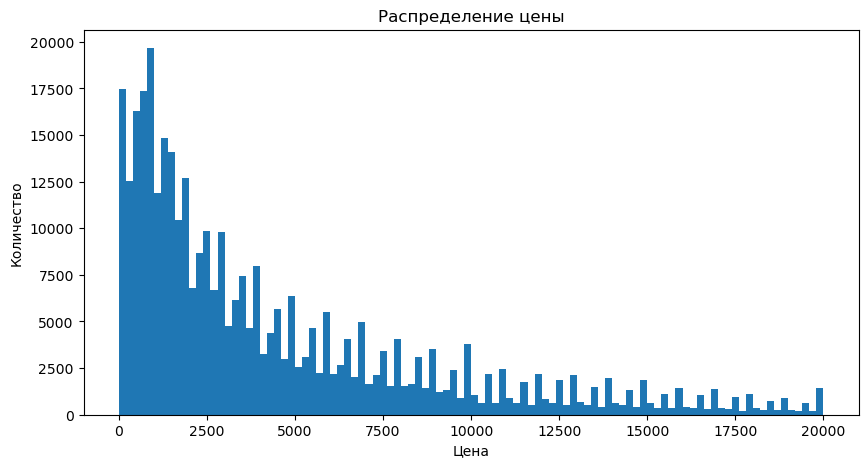

In [208]:
print('Количество пропусков:', df['Price'].isna().sum())
plt.figure(figsize=(10, 5))
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.hist(df['Price'], bins=100)
plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Тут и далее на графиках нужно подписать оси Х и Y, а также названия.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил, спасибо!
</div>

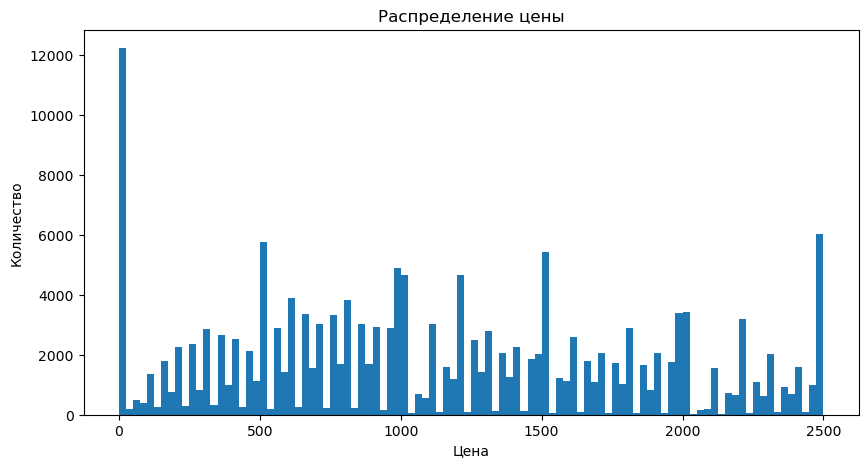

In [209]:
plt.figure(figsize=(10, 5))
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.hist(df['Price'], bins=100, range=(0, 2500))
plt.show()

In [210]:
print('Количество нулевых значений:', df[df['Price'] == 0]['Price'].count())

Количество нулевых значений: 10772


## VehicleType

In [211]:
general_info('VehicleType')

sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64
Количество пропусков: 37490


In [212]:
df[df['VehicleType'].isna()].describe(include='all')

DateCrawled         Price VehicleType  RegistrationYear  \
count                 37490  37490.000000           0      37490.000000   
unique                36331           NaN           0               NaN   
top     2016-03-25 16:51:10           NaN         NaN               NaN   
freq                      3           NaN         NaN               NaN   
mean                    NaN   2375.427954         NaN       2021.098773   
std                     NaN   3213.002249         NaN        276.173531   
min                     NaN      0.000000         NaN       1000.000000   
25%                     NaN    400.000000         NaN       2005.000000   
50%                     NaN   1199.000000         NaN       2016.000000   
75%                     NaN   2999.000000         NaN       2017.000000   
max                     NaN  20000.000000         NaN       9999.000000   

       Gearbox         Power  Model      Kilometer  RegistrationMonth  \
count    27520  37490.000000  30662   37490.000000       37490.000000   
unique       2           NaN    241            NaN                NaN   
top     manual           NaN   golf            NaN                NaN   
freq     23522           NaN   4035            NaN                NaN   
mean       NaN     70.569592    NaN  127180.848226           3.841211   
std        NaN    216.707321    NaN   43882.411412           4.043364   
min        NaN      0.000000    NaN    5000.000000           0.000000   
25%        NaN      0.000000    NaN  125000.000000           0.000000   
50%        NaN     61.000000    NaN  150000.000000           3.000000   
75%        NaN    105.000000    NaN  150000.000000           7.000000   
max        NaN  16011.000000    NaN  150000.000000          12.000000   

       FuelType       Brand Repaired          DateCreated  NumberOfPictures  \
count     20195       37490    16919                37490           37490.0   
unique        7          40        2                   64               NaN   
top      petrol  volkswagen       no  2016-03-20 00:00:00               NaN   
freq      14807        9710    13027                 1380               NaN   
mean        NaN         NaN      NaN                  NaN               0.0   
std         NaN         NaN      NaN                  NaN               0.0   
min         NaN         NaN      NaN                  NaN               0.0   
25%         NaN         NaN      NaN                  NaN               0.0   
50%         NaN         NaN      NaN                  NaN               0.0   
75%         NaN         NaN      NaN                  NaN               0.0   
max         NaN         NaN      NaN                  NaN               0.0   

          PostalCode             LastSeen  
count   37490.000000                37490  
unique           NaN                32537  
top              NaN  2016-04-06 04:16:06  
freq             NaN                    6  
mean    47964.240891                  NaN  
std     25613.384004                  NaN  
min      1067.000000                  NaN  
25%     27392.750000                  NaN  
50%     46119.000000                  NaN  
75%     66499.250000                  NaN  
max     99998.000000                  NaN

## RegistrationYear

In [213]:
general_info('RegistrationYear')

2000    24490
1999    22728
2005    22109
2001    20124
2006    19900
        ...  
6500        1
2290        1
1001        1
9450        1
3500        1
Name: RegistrationYear, Length: 151, dtype: int64
Количество пропусков: 0


## Gearbox

In [214]:
general_info('Gearbox')

manual    268251
auto       66285
Name: Gearbox, dtype: int64
Количество пропусков: 19833


## Power

In [215]:
general_info('Power')

0       40225
75      24023
60      15897
150     14590
101     13298
        ...  
610         1
6006        1
5815        1
6018        1
1241        1
Name: Power, Length: 712, dtype: int64
Количество пропусков: 0


## Model

In [216]:
general_info('Model')

golf                  29232
other                 24421
3er                   19761
polo                  13066
corsa                 12570
                      ...  
i3                        8
serie_3                   4
rangerover                4
range_rover_evoque        2
serie_1                   2
Name: Model, Length: 250, dtype: int64
Количество пропусков: 19705


## Kilometer

150000    238209
125000     36454
100000     14882
90000      11567
80000      10047
70000       8593
60000       7444
5000        6397
50000       6232
40000       4911
30000       4436
20000       3975
10000       1222
Name: Kilometer, dtype: int64
Количество пропусков: 0


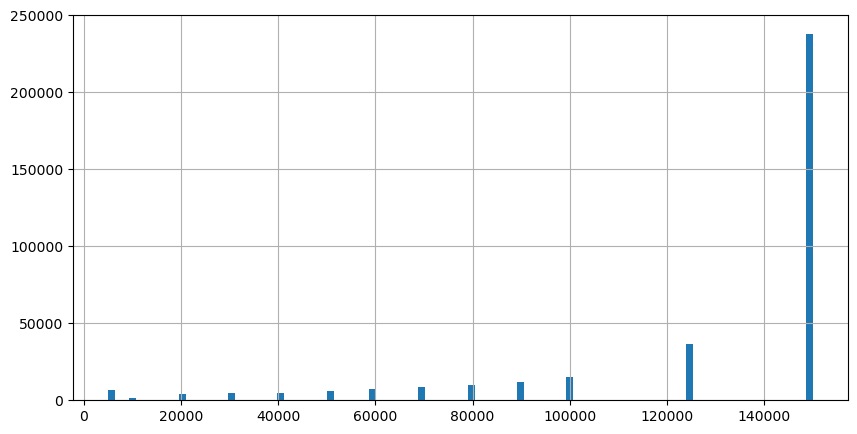

In [217]:
general_info('Kilometer')
df['Kilometer'].hist(bins=100, figsize=(10, 5));

## RegistrationMonth

In [218]:
general_info('RegistrationMonth')

0     37352
3     34373
6     31508
4     29270
5     29153
7     27213
10    26099
12    24289
11    24186
9     23813
1     23219
8     22627
2     21267
Name: RegistrationMonth, dtype: int64
Количество пропусков: 0


## FuelType

In [219]:
general_info('FuelType')

petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64
Количество пропусков: 32895


## Brand

In [220]:
general_info('Brand')

volkswagen        77013
opel              39931
bmw               36914
mercedes_benz     32046
audi              29456
ford              25179
renault           17927
peugeot           10998
fiat               9643
seat               6907
mazda              5615
skoda              5500
smart              5246
citroen            5148
nissan             4941
toyota             4606
hyundai            3587
sonstige_autos     3374
volvo              3210
mini               3202
mitsubishi         3022
honda              2817
kia                2465
suzuki             2323
alfa_romeo         2314
chevrolet          1754
chrysler           1439
dacia               900
daihatsu            806
subaru              762
porsche             758
jeep                677
trabant             589
land_rover          545
daewoo              542
saab                526
jaguar              505
rover               486
lancia              471
lada                225
Name: Brand, dtype: int64
Количество про

## Repaired

In [221]:
general_info('Repaired') 

no     247161
yes     36054
Name: Repaired, dtype: int64
Количество пропусков: 71154


## DateCreated

In [222]:
general_info('DateCreated')

2016-04-03 00:00:00    13719
2016-04-04 00:00:00    13317
2016-03-20 00:00:00    12918
2016-03-12 00:00:00    12840
2016-03-21 00:00:00    12691
                       ...  
2015-08-07 00:00:00        1
2015-12-27 00:00:00        1
2015-11-12 00:00:00        1
2015-12-06 00:00:00        1
2015-06-18 00:00:00        1
Name: DateCreated, Length: 109, dtype: int64
Количество пропусков: 0


## NumberOfPictures

In [223]:
general_info('NumberOfPictures')

0    354369
Name: NumberOfPictures, dtype: int64
Количество пропусков: 0


## PostalCode

In [224]:
general_info('PostalCode')

10115    819
65428    613
66333    343
32257    317
44145    317
        ... 
91801      1
31097      1
82444      1
94359      1
31096      1
Name: PostalCode, Length: 8143, dtype: int64
Количество пропусков: 0


## LastSeen

In [225]:
general_info('LastSeen')

2016-04-06 13:45:54    17
2016-04-07 09:45:10    16
2016-04-06 01:15:23    16
2016-04-06 10:15:26    16
2016-04-07 05:44:30    16
                       ..
2016-03-07 17:46:17     1
2016-03-10 07:49:15     1
2016-04-03 04:18:11     1
2016-03-16 20:19:54     1
2016-03-21 10:42:49     1
Name: LastSeen, Length: 179150, dtype: int64
Количество пропусков: 0


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Данные осмотрели.

### Анализ аномалий

#### Цена

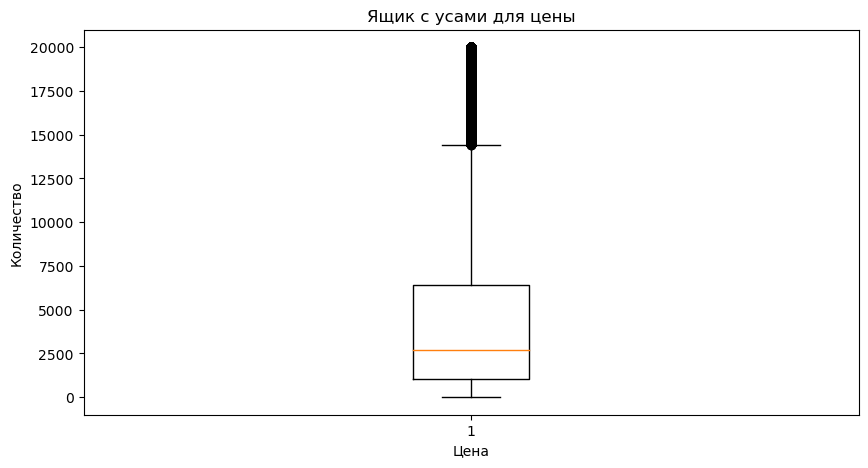

In [226]:
plt.figure(figsize=(10, 5))
plt.title('Ящик с усами для цены')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.boxplot(df['Price'])
plt.show()

In [227]:
df['Price'].describe()

count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: Price, dtype: float64

In [228]:
df[df['Price'] == 0]['Price'].count()

10772

In [229]:
df['Price'].quantile(0.04)

100.0

In [230]:
df[df['Price'] < 100]['Price'].count()

13314

In [231]:
df['Price'].quantile(0.96)

15499.0

In [232]:
df[df['Price'] > 15499]['Price'].count()

14095

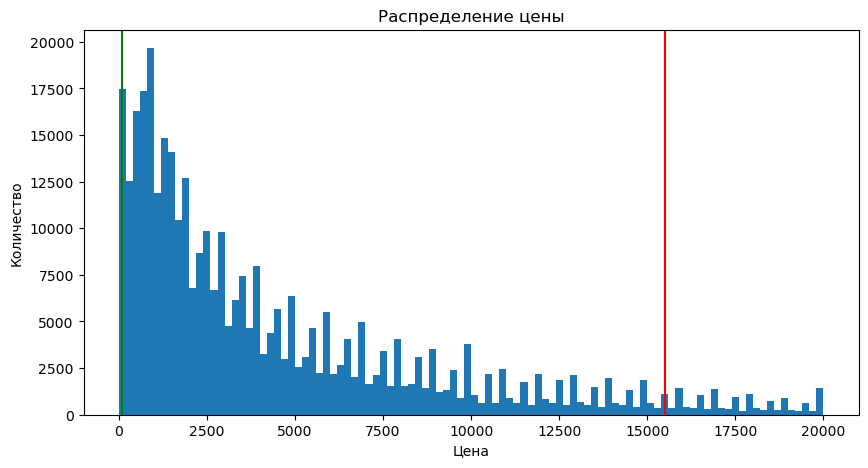

In [233]:
plt.figure(figsize=(10, 5))
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.hist(df['Price'], bins=100)
plt.axvline(df['Price'].quantile(0.96), color='red')
plt.axvline(df['Price'].quantile(0.04), color='green')
plt.show()


In [234]:
df = df[df['Price'] != 0]

#### Год регистрации

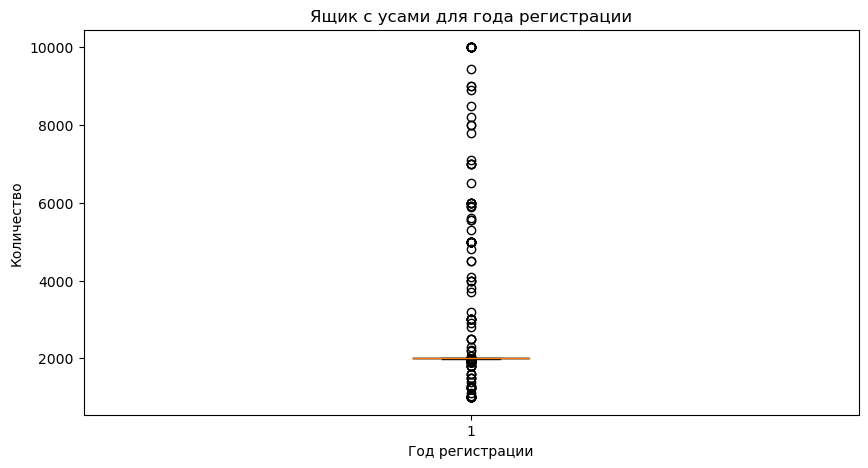

In [235]:
plt.figure(figsize=(10, 5))
plt.title('Ящик с усами для года регистрации')
plt.xlabel('Год регистрации')
plt.ylabel('Количество')
plt.boxplot(df['RegistrationYear'])
plt.show()

In [236]:
df[df['RegistrationYear'] < 1900]['RegistrationYear'].count()

53

In [237]:
df[df['RegistrationYear'] > 2023]['RegistrationYear'].count()

86

In [238]:
df = df[(df['RegistrationYear'] >= 1900) & (df['RegistrationYear'] <= 2023)]

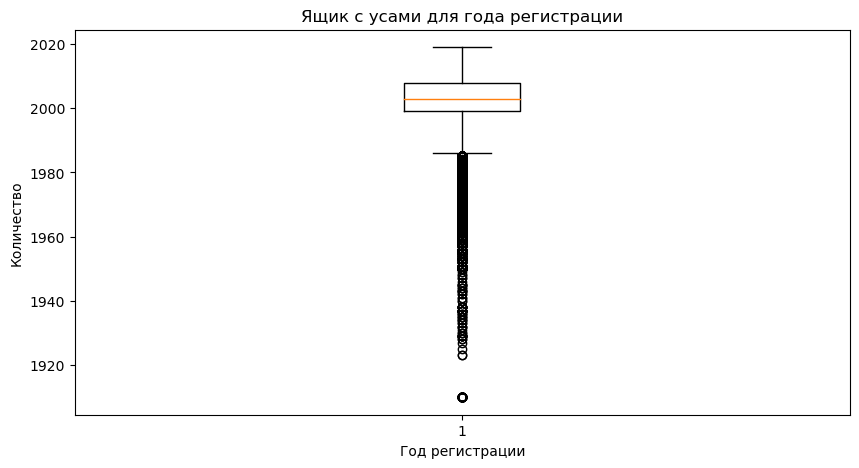

In [239]:
plt.figure(figsize=(10, 5))
plt.title('Ящик с усами для года регистрации')
plt.xlabel('Год регистрации')
plt.ylabel('Количество')
plt.boxplot(df['RegistrationYear'])
plt.show()

#### Мощность

In [240]:
df['Power'].describe()

count    343458.000000
mean        110.981838
std         187.860164
min           0.000000
25%          69.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: Power, dtype: float64

In [241]:
df = df[(df['Power'] >= 10) & (df['Power'] <= 1500)]

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Нужно проанализировать на предмет аномалий признаки `price`, `RegistrationYear` и `power` и избавиться от аномалий.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил, спасибо!
</div>

## Обработка дубликатов

In [242]:
# Проверим дубликаты
print(df.duplicated().sum())

# Удалим дубликаты
df = df.drop_duplicates().reset_index(drop=True)

4


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Найдены и удалены дубликаты.

### Корреляция

In [243]:
df.corr()

/var/folders/70/k39t_x2d08g08hls8fkylcyr0000gn/T/ipykernel_6809/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Price  RegistrationYear     Power  Kilometer  \
Price              1.000000          0.421483  0.465970  -0.385609   
RegistrationYear   0.421483          1.000000  0.100780  -0.252448   
Power              0.465970          0.100780  1.000000   0.092788   
Kilometer         -0.385609         -0.252448  0.092788   1.000000   
RegistrationMonth  0.071998          0.026869  0.040018  -0.015459   
NumberOfPictures        NaN               NaN       NaN        NaN   
PostalCode         0.064693          0.020056  0.048957  -0.010604   

                   RegistrationMonth  NumberOfPictures  PostalCode  
Price                       0.071998               NaN    0.064693  
RegistrationYear            0.026869               NaN    0.020056  
Power                       0.040018               NaN    0.048957  
Kilometer                  -0.015459               NaN   -0.010604  
RegistrationMonth           1.000000               NaN    0.003195  
NumberOfPictures                 NaN               NaN         NaN  
PostalCode                  0.003195               NaN    1.000000

RegistrationMonth и PostalCode практически не влияют на цену автомобиля. Удалим эти столбцы.

# Подготовка признаков и Pipeline

In [244]:
X = df.drop(["Price", "DateCrawled", "DateCreated", "LastSeen", "NumberOfPictures", "RegistrationMonth", "PostalCode"], axis=1)
y = df['Price']

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Удалена часть лишних признаков.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Давай подумаем о том, как на ценообразование влияют призаки `PostalCode` и `RegistrationMonth`?

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил, спасибо!
</div>

In [245]:
# создадим валидационную и тестовую выборки
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12345)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=12345)

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

In [246]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
У `OneHotEncoder` обязательно нужно настраивать параметр `drop='first'` (или другой, в зависимости от задачи) при использовании линейных моделей, чтобы в трансформированной матрице не было мультиколлинеарности и чтобы не попасть в дамми-ловушку: https://www.codecamp.ru/blog/dummy-variable-trap/.
    
Может понадобиться обновление библиотеки `sklearn`, так как в ранних версиях параметры `handle_unknown` и `drop` конфликтовали друг с другом, но в актуальной версии библиотеки такой проблемы нет.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Да, бональная ошибка, спасибо!
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

Для древесных моделей и моделей на бустингах не стоит использовать `OneHotEncoder()` или его аналог `get_dummies()`: эта техника кодирования увеличивает количество признаков, в результате чего модели сложнее создавать разделяющие правила, поэтому время работы и расчётные характеристики моделей сильно страдают на больших наборах данных. Вместо этого нужно использовать `OrdinalEncoder()` - эта техника кодирует категориальные признаки так, что с ними удобнее работать в ходе создания разделяющих правил. 
    
Для бустинговых алгоритмов альетрнатинва - использование внутренних кодировщиков, которые работают лучше сторонних. В случае `CatBoost` за это отвечает параметр `cat_features`. В случае `LightGBM` можно привести эти категориальные признаки к типу `category`, тогда модель будет работать с категориальными признаками автоматически.

In [247]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [248]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

<div class="alert alert-success">
<h2> Комментарий тимлида ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Здорово, что используешь сочетание `ColumnTransformer` и `Pipeline` для соединения разных инструментов в единый объект - так твоё решение будет более гибким и масштабируемым. 

## Подбор гиперпараметров моделей

### LinearRegression

In [249]:
lr = Ridge(fit_intercept=True)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

При использовании моделей (кроме линейной регрессии) важно настроить параметр `random_state`, чтобы результаты работы над проектом были воспроизводимы при его перезапуске.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил, спасибо!
</div>

In [250]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr', lr)
])

lr_param_grid = {
    'lr__alpha': np.logspace(-6, 6, 13),
}

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Гипрепараметр `fit_intercept` должен быть настроен во время инициализации модели в зависимости от того, как подготовлены данные. О том, как правильно выполнить настройку, смотри в документации модели.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Не знал, поправил)
</div>

In [251]:
lr_grid = RandomizedSearchCV(lr_pipeline, 
                   lr_param_grid, 
                   cv=5, 
                   scoring='neg_mean_squared_error', 
                   n_jobs=8, 
                   verbose=2)

In [252]:
%%time
lr_fitted = lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END ................................lr__alpha=1000000.0; total time=   0.5s
[CV] END ................................lr__alpha=1000000.0; total time=   0.5s
[CV] END ................................lr__alpha=1000000.0; total time=   0.5s
[CV] END ....................................lr__alpha=0.001; total time=   0.9s
[CV] END ....................................lr__alpha=0.001; total time=   1.0s
[CV] END ....................................lr__alpha=0.001; total time=   1.0s
[CV] END ....................................lr__alpha=0.001; total time=   1.0s
[CV] END ....................................lr__alpha=0.001; total time=   1.0s
[CV] END ................................lr__alpha=1000000.0; total time=   0.4s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END ................................lr__alpha=1000000.0; total time=   0.5s
[CV] END ...................................lr__alpha=0.0001; total time=   0.9s
[CV] END ....................................lr__alpha=100.0; total time=   0.6s
[CV] END ....................................lr__alpha=100.0; total time=   0.6s
[CV] END ....................................lr__alpha=100.0; total time=   0.6s
[CV] END ...................................lr__alpha=0.0001; total time=   0.9s
[CV] END ...................................lr__alpha=0.0001; total time=   0.9s
[CV] END ...................................lr__alpha=0.0001; total time=   0.9s
[CV] END ...................................lr__alpha=0.0001; total time=   0.9s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END ....................................lr__alpha=100.0; total time=   0.6s
[CV] END ....................................lr__alpha=100.0; total time=   0.6s
[CV] END ......................................lr__alpha=0.1; total time=   0.9s
[CV] END ......................................lr__alpha=0.1; total time=   0.9s
[CV] END ......................................lr__alpha=0.1; total time=   0.9s
[CV] END ......................................lr__alpha=0.1; total time=   0.9s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END ......................................lr__alpha=0.1; total time=   0.9s
[CV] END ....................................lr__alpha=1e-05; total time=   0.9s
[CV] END ....................................lr__alpha=1e-05; total time=   1.0s
[CV] END ....................................lr__alpha=1e-05; total time=   0.9s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END ....................................lr__alpha=1e-05; total time=   0.9s
[CV] END ....................................lr__alpha=1e-05; total time=   0.9s
[CV] END .....................................lr__alpha=0.01; total time=   0.9s
[CV] END .....................................lr__alpha=0.01; total time=   0.9s
[CV] END .....................................lr__alpha=0.01; total time=   1.0s
[CV] END .....................................lr__alpha=0.01; total time=   0.9s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END .....................................lr__alpha=0.01; total time=   0.9s
[CV] END ......................................lr__alpha=1.0; total time=   0.9s
[CV] END ......................................lr__alpha=1.0; total time=   0.9s
[CV] END ......................................lr__alpha=1.0; total time=   0.9s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END .....................................lr__alpha=10.0; total time=   0.8s
[CV] END ......................................lr__alpha=1.0; total time=   0.9s
[CV] END ......................................lr__alpha=1.0; total time=   0.9s
[CV] END .....................................lr__alpha=10.0; total time=   0.8s
[CV] END .....................................lr__alpha=10.0; total time=   0.8s
[CV] END .....................................lr__alpha=10.0; total time=   0.8s
[CV] END .................................lr__alpha=100000.0; total time=   0.5s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END .................................lr__alpha=100000.0; total time=   0.5s
[CV] END .....................................lr__alpha=10.0; total time=   0.8s
[CV] END .................................lr__alpha=100000.0; total time=   0.4s
[CV] END .................................lr__alpha=100000.0; total time=   0.4s
[CV] END .................................lr__alpha=100000.0; total time=   0.4s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


CPU times: user 2.57 s, sys: 432 ms, total: 3 s
Wall time: 7.64 s


In [253]:
%%time
lr_predict = lr_fitted.predict(X_valid)

CPU times: user 33.9 ms, sys: 2.66 ms, total: 36.6 ms
Wall time: 35.8 ms


In [254]:
lr_rmse = mean_squared_error(y_valid, lr_predict) ** 0.5
print('LR RMSE:', lr_rmse)
print("Лучшие параметры:", lr_grid.best_params_)

LR RMSE: 2745.6836267327362
Лучшие параметры: {'lr__alpha': 1.0}


LR RMSE: 2745.991602992436

Лучшие параметры: {'lr__alpha': 0.01}

### Random Forest Regressor

In [255]:
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)

rfr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfr', rfr)
])

rfr_param_grid = {
    'rfr__n_estimators': [100, 200],
    'rfr__max_depth': [None] + [i for i in range(2, 7)],
    'rfr__min_samples_leaf': [1, 2]
}

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Для гиперпараметра `max_depth` рассматривается очень длинная последовательность: деревья с большой глубиной склонны к переобучению, а обучаются и предсказывают результат они дольше, поэтому делать их слишком глубокими не стоит - оптимальное значение почти всегда лежит в диапазоне от 2 до 5-6. Кроме того, можно попробовать значение `None` - в итоге оптимальная последовательность может выглядеть как `[None] + [i for i in range(2, 7)]`.
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Потестим
</div>

In [256]:
rfr_grid = RandomizedSearchCV(rfr_pipeline, 
                   rfr_param_grid, 
                   random_state=42,
                   cv=5, 
                   scoring='neg_mean_squared_error', 
                   n_jobs=8, 
                   verbose=2)

In [257]:
%%time
rfr_fitted = rfr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=   8.9s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=   9.2s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=   9.3s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=   9.5s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=   9.9s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  15.4s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  15.4s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  16.0s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  16.6s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  16.7s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=2, rfr__n_estimators=100; total time=  19.2s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=5, rfr__min_samples_leaf=2, rfr__n_estimators=100; total time=  19.0s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=2, rfr__n_estimators=100; total time=  19.2s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=2, rfr__n_estimators=100; total time=  18.2s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=2, rfr__n_estimators=100; total time=  19.6s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=2, rfr__n_estimators=200; total time=  20.5s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=2, rfr__n_estimators=200; total time=  20.4s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=3, rfr__min_samples_leaf=2, rfr__n_estimators=200; total time=  22.3s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=2, rfr__n_estimators=200; total time=  23.8s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=2, rfr__n_estimators=200; total time=  23.7s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  23.5s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  24.5s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  23.2s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  23.3s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  24.1s
[CV] END rfr__max_depth=4, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  29.3s
[CV] END rfr__max_depth=4, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  27.5s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=4, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  27.7s
[CV] END rfr__max_depth=4, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  25.0s
[CV] END rfr__max_depth=4, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  26.2s
[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=14.2min


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=14.2min


/Users/vs/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=14.2min
[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=14.2min
[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=14.2min
[CV] END rfr__max_depth=6, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  47.4s
[CV] END rfr__max_depth=6, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  47.6s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=6, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  48.4s
[CV] END rfr__max_depth=2, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  17.6s
[CV] END rfr__max_depth=2, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  13.6s
[CV] END rfr__max_depth=6, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  48.2s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=2, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  13.8s
[CV] END rfr__max_depth=6, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  48.2s
[CV] END rfr__max_depth=2, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  16.7s
[CV] END rfr__max_depth=2, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  15.5s
[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=26.1min
[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=26.6min


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=26.8min
[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=17.1min
[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=17.2min
CPU times: user 46min 55s, sys: 9.23 s, total: 47min 4s
Wall time: 36min 42s


In [258]:
%%time
rfr_predict = rfr_fitted.predict(X_valid)

CPU times: user 2.68 s, sys: 163 ms, total: 2.84 s
Wall time: 347 ms


In [259]:
rfr_rmse = mean_squared_error(y_valid, rfr_predict) ** 0.5
print('RFR RMSE:', rfr_rmse)
print("Лучшие параметры:", rfr_grid.best_params_)

RFR RMSE: 1552.188305613231
Лучшие параметры: {'rfr__n_estimators': 200, 'rfr__min_samples_leaf': 1, 'rfr__max_depth': None}


RFR RMSE: 1552.188305613231

Лучшие параметры: {'rfr__n_estimators': 200, 'rfr__min_samples_leaf': 1, 'rfr__max_depth': None}

### K Neighbors Regressor

In [260]:
knr = KNeighborsRegressor()

knr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knr', knr)
])

knr_param_grid = {
}

knr_grid = RandomizedSearchCV(knr_pipeline, 
                   knr_param_grid, 
                   random_state=42,
                   cv=10, 
                   scoring='neg_mean_squared_error', 
                   n_jobs=-1, 
                   verbose=2)

In [261]:
%%time
knr_fitted = knr_grid.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END .................................................... total time= 5.4min
[CV] END .................................................... total time= 5.4min
[CV] END .................................................... total time= 5.4min
[CV] END .................................................... total time= 5.4min
[CV] END .................................................... total time= 5.4min
[CV] END .................................................... total time= 5.4min
[CV] END .................................................... total time= 5.4min
[CV] END .................................................... total time= 5.4min
[CV] END .................................................... total time= 5.4min
[CV] END .................................................... total time= 5.4min
CPU times: user 701 ms, sys: 228 ms, total: 929 ms
Wall time: 5min 26s


In [262]:
%%time
knr_predict = knr_fitted.predict(X_valid)

CPU times: user 7min 13s, sys: 1.51 s, total: 7min 15s
Wall time: 45.7 s


In [263]:
knr_rmse = mean_squared_error(y_valid, knr_predict) ** 0.5
print('KNR RMSE:', knr_rmse)

KNR RMSE: 1753.6664253237252


KNR RMSE: 1753.6664253237252

### LightGBM

In [264]:
lgbm = lgb.LGBMRegressor(random_state=42)

lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lgbm', lgbm)
])

lgbm_param_grid = {
    'lgbm__num_leaves': randint(6, 50),
    'lgbm__min_child_samples': randint(100, 500),
    'lgbm__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'lgbm__subsample': uniform(loc=0.2, scale=0.8),
    'lgbm__colsample_bytree': uniform(loc=0.4, scale=0.6),
    'lgbm__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'lgbm__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
    'lgbm__learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'lgbm__n_estimators': [100, 200, 500, 1000, 2000]
}

lgbm_grid = RandomizedSearchCV(lgbm_pipeline, 
                   lgbm_param_grid, 
                   random_state=42,
                   cv=2, 
                   scoring='neg_mean_squared_error', 
                   n_jobs=8, 
                   verbose=2)

In [265]:
%%time
lgbm_fitted = lgbm_grid.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END lgbm__colsample_bytree=0.9631316254094501, lgbm__learning_rate=0.05, lgbm__min_child_samples=291, lgbm__min_child_weight=1, lgbm__n_estimators=100, lgbm__num_leaves=17, lgbm__reg_alpha=7, lgbm__reg_lambda=10, lgbm__subsample=0.5455560149136927; total time=   1.5s
[CV] END lgbm__colsample_bytree=0.9631316254094501, lgbm__learning_rate=0.05, lgbm__min_child_samples=291, lgbm__min_child_weight=1, lgbm__n_estimators=100, lgbm__num_leaves=17, lgbm__reg_alpha=7, lgbm__reg_lambda=10, lgbm__subsample=0.5455560149136927; total time=   1.5s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_enco

[CV] END lgbm__colsample_bytree=0.5747374841188252, lgbm__learning_rate=0.1, lgbm__min_child_samples=269, lgbm__min_child_weight=0.01, lgbm__n_estimators=1000, lgbm__num_leaves=8, lgbm__reg_alpha=5, lgbm__reg_lambda=1, lgbm__subsample=0.7442460308702239; total time=   6.3s
[CV] END lgbm__colsample_bytree=0.5747374841188252, lgbm__learning_rate=0.1, lgbm__min_child_samples=269, lgbm__min_child_weight=0.01, lgbm__n_estimators=1000, lgbm__num_leaves=8, lgbm__reg_alpha=5, lgbm__reg_lambda=1, lgbm__subsample=0.7442460308702239; total time=   6.4s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END lgbm__colsample_bytree=0.4348501673009197, lgbm__learning_rate=1, lgbm__min_child_samples=199, lgbm__min_child_weight=1000.0, lgbm__n_estimators=500, lgbm__num_leaves=27, lgbm__reg_alpha=5, lgbm__reg_lambda=0.1, lgbm__subsample=0.7775990178134597; total time=   9.8s
[CV] END lgbm__colsample_bytree=0.4348501673009197, lgbm__learning_rate=1, lgbm__min_child_samples=199, lgbm__min_child_weight=1000.0, lgbm__n_estimators=500, lgbm__num_leaves=27, lgbm__reg_alpha=5, lgbm__reg_lambda=0.1, lgbm__subsample=0.7775990178134597; total time=   9.8s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END lgbm__colsample_bytree=0.6702995511817258, lgbm__learning_rate=0.05, lgbm__min_child_samples=487, lgbm__min_child_weight=10000.0, lgbm__n_estimators=1000, lgbm__num_leaves=19, lgbm__reg_alpha=0.1, lgbm__reg_lambda=0.1, lgbm__subsample=0.4436910153386966; total time=   9.3s
[CV] END lgbm__colsample_bytree=0.6702995511817258, lgbm__learning_rate=0.05, lgbm__min_child_samples=487, lgbm__min_child_weight=10000.0, lgbm__n_estimators=1000, lgbm__num_leaves=19, lgbm__reg_alpha=0.1, lgbm__reg_lambda=0.1, lgbm__subsample=0.4436910153386966; total time=   9.5s
[CV] END lgbm__colsample_bytree=0.5093416526728374, lgbm__learning_rate=0.5, lgbm__min_child_samples=101, lgbm__min_child_weight=10.0, lgbm__n_estimators=200, lgbm__num_leaves=9, lgbm__reg_alpha=7, lgbm__reg_lambda=10, lgbm__subsample=0.9756677022116469; total time=   1.6s
[CV] END lgbm__colsample_bytree=0.5093416526728374, lgbm__learning_rate=0.5, lgbm__min_child_samples=101, lgbm__min_child_weight=10.0, lgbm__n_estimators=200, l

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_enco

[CV] END lgbm__colsample_bytree=0.8633468615779945, lgbm__learning_rate=0.5, lgbm__min_child_samples=235, lgbm__min_child_weight=1000.0, lgbm__n_estimators=500, lgbm__num_leaves=22, lgbm__reg_alpha=50, lgbm__reg_lambda=1, lgbm__subsample=0.8321404324249646; total time=   7.5s
[CV] END lgbm__colsample_bytree=0.8633468615779945, lgbm__learning_rate=0.5, lgbm__min_child_samples=235, lgbm__min_child_weight=1000.0, lgbm__n_estimators=500, lgbm__num_leaves=22, lgbm__reg_alpha=50, lgbm__reg_lambda=1, lgbm__subsample=0.8321404324249646; total time=   7.6s
[CV] END lgbm__colsample_bytree=0.7238152794334478, lgbm__learning_rate=0.05, lgbm__min_child_samples=316, lgbm__min_child_weight=10000.0, lgbm__n_estimators=2000, lgbm__num_leaves=20, lgbm__reg_alpha=0, lgbm__reg_lambda=0, lgbm__subsample=0.9895095492804138; total time=  18.5s
[CV] END lgbm__colsample_bytree=0.7238152794334478, lgbm__learning_rate=0.05, lgbm__min_child_samples=316, lgbm__min_child_weight=10000.0, lgbm__n_estimators=2000, lgb

In [266]:
%%time
lgbm_predict = lgbm_fitted.predict(X_valid)

CPU times: user 1.39 s, sys: 110 ms, total: 1.5 s
Wall time: 184 ms


In [267]:
lgbm_rmse = mean_squared_error(y_valid, lgbm_predict) ** 0.5
print('LGBM RMSE:', lgbm_rmse)
print("Лучшие параметры:", lgbm_grid.best_params_)

LGBM RMSE: 1600.5246373727934
Лучшие параметры: {'lgbm__colsample_bytree': 0.45860326840383037, 'lgbm__learning_rate': 0.5, 'lgbm__min_child_samples': 191, 'lgbm__min_child_weight': 100.0, 'lgbm__n_estimators': 1000, 'lgbm__num_leaves': 13, 'lgbm__reg_alpha': 1, 'lgbm__reg_lambda': 20, 'lgbm__subsample': 0.5128484860585927}


LGBM RMSE: 1600.5246373727934

Лучшие параметры: {'lgbm__colsample_bytree': 0.45860326840383037, 
'lgbm__learning_rate': 0.5, 
'lgbm__min_child_samples': 191, 
'lgbm__min_child_weight': 100.0, 
'lgbm__n_estimators': 1000, 
'lgbm__num_leaves': 13, 
'lgbm__reg_alpha': 1, 
'lgbm__reg_lambda': 20, 
'lgbm__subsample': 0.5128484860585927}

### CatBoost Regressor

In [268]:
cbr = CatBoostRegressor()

cbr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('cbr', cbr)
])

cbr_param_grid = {
    'cbr__iterations': randint(100, 1000),
    'cbr__depth': randint(1, 8),
    'cbr__learning_rate': uniform(0.01, 0.3),
    'cbr__l2_leaf_reg': randint(2, 30),
    'cbr__border_count': randint(1, 255),
    'cbr__thread_count': [4]
}

cbr_grid = RandomizedSearchCV(cbr_pipeline, 
                   cbr_param_grid, 
                   random_state=42,
                   cv=5, 
                   scoring='neg_mean_squared_error', 
                   verbose=2)

In [269]:
%%time
cbr_fitted = cbr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 4019.6058716	total: 10.4ms	remaining: 9.99s
1:	learn: 3571.8736314	total: 16ms	remaining: 7.68s
2:	learn: 3240.0200242	total: 21.1ms	remaining: 6.74s
3:	learn: 3006.2818886	total: 26.3ms	remaining: 6.28s
4:	learn: 2838.8864600	total: 31.6ms	remaining: 6.04s
5:	learn: 2685.1850425	total: 36.5ms	remaining: 5.81s
6:	learn: 2588.2179540	total: 41.5ms	remaining: 5.65s
7:	learn: 2494.5499051	total: 46.3ms	remaining: 5.5s
8:	learn: 2421.6422042	total: 51ms	remaining: 5.39s
9:	learn: 2367.9951038	total: 55.9ms	remaining: 5.31s
10:	learn: 2320.5680077	total: 60.6ms	remaining: 5.23s
11:	learn: 2284.2953548	total: 65.3ms	remaining: 5.16s
12:	learn: 2255.9705624	total: 70.1ms	remaining: 5.11s
13:	learn: 2224.3305694	total: 75ms	remaining: 5.06s
14:	learn: 2199.6000012	total: 79.7ms	remaining: 5.02s
15:	learn: 2178.5193903	total: 84.4ms	remaining: 4.98s
16:	learn: 2163.5599776	total: 89ms	remaining: 4.94s
17:	learn: 2144.9687378

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END cbr__border_count=103, cbr__depth=4, cbr__iterations=960, cbr__l2_leaf_reg=16, cbr__learning_rate=0.22959818254342154, cbr__thread_count=4; total time=   5.0s
0:	learn: 4010.6124421	total: 5.18ms	remaining: 4.97s
1:	learn: 3563.3194699	total: 10.1ms	remaining: 4.83s
2:	learn: 3233.0448901	total: 14.9ms	remaining: 4.75s
3:	learn: 2999.0346012	total: 19.8ms	remaining: 4.73s
4:	learn: 2833.4731122	total: 24.6ms	remaining: 4.7s
5:	learn: 2681.4257017	total: 29.4ms	remaining: 4.67s
6:	learn: 2581.4285601	total: 33.9ms	remaining: 4.61s
7:	learn: 2498.2018549	total: 38.8ms	remaining: 4.61s
8:	learn: 2426.5919409	total: 43.6ms	remaining: 4.61s
9:	learn: 2369.6772252	total: 48.4ms	remaining: 4.59s
10:	learn: 2324.8569121	total: 53.2ms	remaining: 4.59s
11:	learn: 2291.7205625	total: 57.9ms	remaining: 4.58s
12:	learn: 2261.5072012	total: 62.7ms	remaining: 4.56s
13:	learn: 2228.8236612	total: 67.3ms	remaining: 4.55s
14:	learn: 2203.1700251	total: 72.2ms	remaining: 4.55s
15:	learn: 2183.10

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END cbr__border_count=189, cbr__depth=5, cbr__iterations=714, cbr__l2_leaf_reg=27, cbr__learning_rate=0.05679835610086079, cbr__thread_count=4; total time=   4.1s
0:	learn: 4430.6890528	total: 5.68ms	remaining: 4.05s
1:	learn: 4284.2661448	total: 11.1ms	remaining: 3.96s
2:	learn: 4141.9492001	total: 16.7ms	remaining: 3.95s
3:	learn: 4013.0101858	total: 22.2ms	remaining: 3.94s
4:	learn: 3894.5531241	total: 27.5ms	remaining: 3.9s
5:	learn: 3784.4065886	total: 33ms	remaining: 3.9s
6:	learn: 3673.9832785	total: 38.5ms	remaining: 3.89s
7:	learn: 3577.2656116	total: 43.8ms	remaining: 3.87s
8:	learn: 3483.2031519	total: 49.5ms	remaining: 3.88s
9:	learn: 3392.4637539	total: 54.9ms	remaining: 3.87s
10:	learn: 3315.1579600	total: 60.7ms	remaining: 3.88s
11:	learn: 3244.3419991	total: 66.3ms	remaining: 3.88s
12:	learn: 3170.4864310	total: 72.1ms	remaining: 3.89s
13:	learn: 3109.3908960	total: 77.9ms	remaining: 3.89s
14:	learn: 3044.9895554	total: 83.3ms	remaining: 3.88s
15:	learn: 2986.31394

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END cbr__border_count=75, cbr__depth=3, cbr__iterations=187, cbr__l2_leaf_reg=22, cbr__learning_rate=0.19033450352296263, cbr__thread_count=4; total time=   1.3s
0:	learn: 4138.7407573	total: 4.75ms	remaining: 884ms
1:	learn: 3791.0662134	total: 9.17ms	remaining: 849ms
2:	learn: 3520.4444507	total: 13.7ms	remaining: 839ms
3:	learn: 3283.6344164	total: 18.2ms	remaining: 832ms
4:	learn: 3128.6819651	total: 22.6ms	remaining: 824ms
5:	learn: 3003.7937484	total: 27.1ms	remaining: 818ms
6:	learn: 2878.3652391	total: 31.7ms	remaining: 815ms
7:	learn: 2770.9980513	total: 35.9ms	remaining: 803ms
8:	learn: 2686.4536339	total: 40ms	remaining: 791ms
9:	learn: 2620.7209356	total: 44.5ms	remaining: 788ms
10:	learn: 2568.1829781	total: 48.7ms	remaining: 779ms
11:	learn: 2518.3253346	total: 53.1ms	remaining: 775ms
12:	learn: 2476.3374387	total: 57.2ms	remaining: 766ms
13:	learn: 2440.3375144	total: 61.3ms	remaining: 757ms
14:	learn: 2404.9807978	total: 65.9ms	remaining: 756ms
15:	learn: 2378.0282

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0:	learn: 3899.8249318	total: 4.46ms	remaining: 3.39s
1:	learn: 3454.7742373	total: 8.79ms	remaining: 3.34s
2:	learn: 3113.0213272	total: 13.2ms	remaining: 3.33s
3:	learn: 2915.8518190	total: 17.4ms	remaining: 3.3s
4:	learn: 2745.1501739	total: 21.7ms	remaining: 3.28s
5:	learn: 2620.8682679	total: 25.9ms	remaining: 3.26s
6:	learn: 2539.1595331	total: 30ms	remaining: 3.24s
7:	learn: 2473.3304266	total: 34.3ms	remaining: 3.23s
8:	learn: 2419.7454298	total: 38.3ms	remaining: 3.2s
9:	learn: 2379.4944224	total: 42.4ms	remaining: 3.19s
10:	learn: 2334.9456443	total: 47ms	remaining: 3.2s
11:	learn: 2304.3691370	total: 51.2ms	remaining: 3.2s
12:	learn: 2269.6923870	total: 55.6ms	remaining: 3.2s
13:	learn: 2245.8887071	total: 60.2ms	remaining: 3.21s
14:	learn: 2223.8435954	total: 64.8ms	remaining: 3.22s
15:	learn: 2208.2931888	total: 68.9ms	remaining: 3.21s
16:	learn: 2194.1162321	total: 73.2ms	remaining: 3.2s
17:	learn: 2174.1778493	total: 77.7ms	remaining: 3.21s
18:	learn: 2163.7572902	total:

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END cbr__border_count=236, cbr__depth=6, cbr__iterations=905, cbr__l2_leaf_reg=3, cbr__learning_rate=0.06454749016213018, cbr__thread_count=4; total time=   5.6s
0:	learn: 4394.6446392	total: 5.95ms	remaining: 5.38s
1:	learn: 4217.7145285	total: 11.9ms	remaining: 5.38s
2:	learn: 4056.8092745	total: 17.9ms	remaining: 5.37s
3:	learn: 3905.4999020	total: 23.8ms	remaining: 5.37s
4:	learn: 3769.4307038	total: 29.9ms	remaining: 5.38s
5:	learn: 3642.5204272	total: 35.8ms	remaining: 5.37s
6:	learn: 3523.0755165	total: 42ms	remaining: 5.39s
7:	learn: 3413.4244972	total: 48.2ms	remaining: 5.4s
8:	learn: 3309.7997587	total: 54.1ms	remaining: 5.39s
9:	learn: 3220.7966412	total: 60.5ms	remaining: 5.42s
10:	learn: 3134.3912519	total: 66.9ms	remaining: 5.43s
11:	learn: 3058.9494788	total: 73.2ms	remaining: 5.45s
12:	learn: 2987.2357750	total: 79.3ms	remaining: 5.44s
13:	learn: 2918.6158316	total: 85.3ms	remaining: 5.43s
14:	learn: 2860.2335825	total: 91.2ms	remaining: 5.41s
15:	learn: 2802.23614

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0:	learn: 4352.6309262	total: 3.5ms	remaining: 1.95s
1:	learn: 4175.5295017	total: 6.75ms	remaining: 1.88s
2:	learn: 4034.5798114	total: 10.1ms	remaining: 1.87s
3:	learn: 3907.9203800	total: 13.4ms	remaining: 1.86s
4:	learn: 3809.9012354	total: 16.8ms	remaining: 1.86s
5:	learn: 3715.3883896	total: 20ms	remaining: 1.84s
6:	learn: 3638.1032140	total: 23.2ms	remaining: 1.82s
7:	learn: 3560.8373608	total: 26.4ms	remaining: 1.82s
8:	learn: 3496.9999099	total: 29.6ms	remaining: 1.81s
9:	learn: 3433.0282804	total: 32.7ms	remaining: 1.79s
10:	learn: 3381.0379326	total: 36.1ms	remaining: 1.8s
11:	learn: 3330.9187195	total: 39.2ms	remaining: 1.79s
12:	learn: 3287.6312680	total: 42.4ms	remaining: 1.78s
13:	learn: 3245.7732464	total: 45.7ms	remaining: 1.78s
14:	learn: 3210.8547103	total: 49ms	remaining: 1.77s
15:	learn: 3174.5991601	total: 52.4ms	remaining: 1.78s
16:	learn: 3140.9726377	total: 55.6ms	remaining: 1.77s
17:	learn: 3111.5257886	total: 58.8ms	remaining: 1.77s
18:	learn: 3084.7996326	to

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END cbr__border_count=236, cbr__depth=1, cbr__iterations=660, cbr__l2_leaf_reg=28, cbr__learning_rate=0.19355586841671385, cbr__thread_count=4; total time=   2.7s
0:	learn: 4318.6784996	total: 3.47ms	remaining: 2.29s
1:	learn: 4125.7917256	total: 6.87ms	remaining: 2.26s
2:	learn: 3966.3398703	total: 10.2ms	remaining: 2.24s
3:	learn: 3832.8564077	total: 13.7ms	remaining: 2.24s
4:	learn: 3719.8310490	total: 16.9ms	remaining: 2.21s
5:	learn: 3620.7700464	total: 20.2ms	remaining: 2.2s
6:	learn: 3535.8589856	total: 23.4ms	remaining: 2.18s
7:	learn: 3459.0161057	total: 26.8ms	remaining: 2.18s
8:	learn: 3392.2011879	total: 30ms	remaining: 2.17s
9:	learn: 3332.5749015	total: 33.2ms	remaining: 2.16s
10:	learn: 3280.9483220	total: 36.4ms	remaining: 2.15s
11:	learn: 3233.2095250	total: 39.6ms	remaining: 2.14s
12:	learn: 3187.7116007	total: 42.9ms	remaining: 2.14s
13:	learn: 3149.2854633	total: 46.1ms	remaining: 2.13s
14:	learn: 3108.5556205	total: 49.2ms	remaining: 2.12s
15:	learn: 3075.2328

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0:	learn: 4378.8155884	total: 5.04ms	remaining: 4.02s
1:	learn: 4188.9612792	total: 10.2ms	remaining: 4.08s
2:	learn: 4018.7894344	total: 15.2ms	remaining: 4.03s
3:	learn: 3858.4252507	total: 20ms	remaining: 3.98s
4:	learn: 3708.5708481	total: 24.9ms	remaining: 3.96s
5:	learn: 3584.7961226	total: 29.8ms	remaining: 3.94s
6:	learn: 3467.7789623	total: 34.8ms	remaining: 3.94s
7:	learn: 3354.3102393	total: 39.6ms	remaining: 3.92s
8:	learn: 3254.1771291	total: 44.4ms	remaining: 3.9s
9:	learn: 3168.9147794	total: 49.1ms	remaining: 3.88s
10:	learn: 3092.5472446	total: 54.1ms	remaining: 3.87s
11:	learn: 3015.2738840	total: 58.9ms	remaining: 3.86s
12:	learn: 2952.8266893	total: 64.1ms	remaining: 3.88s
13:	learn: 2891.1829784	total: 69.3ms	remaining: 3.88s
14:	learn: 2842.8626246	total: 74.3ms	remaining: 3.88s
15:	learn: 2790.8128797	total: 79.1ms	remaining: 3.87s
16:	learn: 2749.0929018	total: 83.9ms	remaining: 3.86s
17:	learn: 2702.4836767	total: 88.6ms	remaining: 3.84s
18:	learn: 2667.9115806

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END cbr__border_count=190, cbr__depth=7, cbr__iterations=662, cbr__l2_leaf_reg=13, cbr__learning_rate=0.1642703315240835, cbr__thread_count=4; total time=   4.6s
0:	learn: 4092.0659218	total: 6.62ms	remaining: 4.37s
1:	learn: 3694.1625110	total: 13.5ms	remaining: 4.46s
2:	learn: 3381.0244166	total: 19.9ms	remaining: 4.38s
3:	learn: 3112.2203218	total: 26.5ms	remaining: 4.36s
4:	learn: 2906.0569453	total: 33.1ms	remaining: 4.35s
5:	learn: 2744.8756437	total: 39.6ms	remaining: 4.32s
6:	learn: 2606.0191536	total: 45.8ms	remaining: 4.28s
7:	learn: 2499.3999646	total: 52.9ms	remaining: 4.33s
8:	learn: 2412.8183535	total: 59.5ms	remaining: 4.32s
9:	learn: 2343.2309097	total: 66.3ms	remaining: 4.33s
10:	learn: 2284.1533277	total: 72.8ms	remaining: 4.31s
11:	learn: 2238.3138803	total: 79.3ms	remaining: 4.29s
12:	learn: 2193.3423155	total: 85.7ms	remaining: 4.28s
13:	learn: 2151.2704713	total: 92.4ms	remaining: 4.28s
14:	learn: 2118.5216438	total: 98.7ms	remaining: 4.25s
15:	learn: 2089.76

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END cbr__border_count=64, cbr__depth=1, cbr__iterations=230, cbr__l2_leaf_reg=6, cbr__learning_rate=0.1922634555704315, cbr__thread_count=4; total time=   1.3s
0:	learn: 4320.2755612	total: 3.43ms	remaining: 786ms
1:	learn: 4128.0777800	total: 6.79ms	remaining: 775ms
2:	learn: 3968.8240642	total: 10.2ms	remaining: 773ms
3:	learn: 3835.5252632	total: 13.5ms	remaining: 764ms
4:	learn: 3723.0543790	total: 16.9ms	remaining: 762ms
5:	learn: 3623.9015090	total: 20.2ms	remaining: 753ms
6:	learn: 3539.1711336	total: 23.5ms	remaining: 748ms
7:	learn: 3462.5768858	total: 26.8ms	remaining: 743ms
8:	learn: 3397.4327581	total: 30ms	remaining: 737ms
9:	learn: 3339.4049850	total: 33.4ms	remaining: 734ms
10:	learn: 3288.2554568	total: 36.7ms	remaining: 731ms
11:	learn: 3239.8114607	total: 40ms	remaining: 726ms
12:	learn: 3195.9003400	total: 43.2ms	remaining: 721ms
13:	learn: 3158.1431709	total: 46.4ms	remaining: 716ms
14:	learn: 3120.8857649	total: 49.6ms	remaining: 711ms
15:	learn: 3084.4435115	

In [270]:
%%time
cbr_predict = cbr_fitted.predict(X_valid)

CPU times: user 110 ms, sys: 14.1 ms, total: 124 ms
Wall time: 51.2 ms


In [271]:
cbr_rmse = mean_squared_error(y_valid, cbr_predict) ** 0.5
print('CBR RMSE:', cbr_rmse)
print("Лучшие параметры:", cbr_grid.best_params_)

CBR RMSE: 1588.3326311517453
Лучшие параметры: {'cbr__border_count': 190, 'cbr__depth': 7, 'cbr__iterations': 662, 'cbr__l2_leaf_reg': 13, 'cbr__learning_rate': 0.1642703315240835, 'cbr__thread_count': 4}


CBR RMSE: 1751.2466656650615

Лучшие параметры: {'cbr__border_count': 190, 'cbr__depth': 7, 'cbr__iterations': 662, 'cbr__l2_leaf_reg': 13, 'cbr__learning_rate': 0.1642703315240835, 'cbr__thread_count': 4}

### Выводы по моделям

Linear Regression (Ridge)
* LR RMSE: 2745.991602992436
* Лучшие параметры: {'lr__alpha': 0.01}

Random Forest Regressor
* RFR RMSE: 1552.188305613231
* Лучшие параметры: {'rfr__n_estimators': 200, 'rfr__min_samples_leaf': 1, 'rfr__max_depth': None}

K Neighbors Regressor
* KNR RMSE: 1753.6664253237252
* Параметры модели не подбирались, так как время обучения очень долгое, но модель показала хороший результат и может быть использована для дальнейшего изучения

LightGBM
* LGBM RMSE: 1600.5246373727934

* Лучшие параметры: {'lgbm__colsample_bytree': 0.45860326840383037, 
'lgbm__learning_rate': 0.5, 
'lgbm__min_child_samples': 191, 
'lgbm__min_child_weight': 100.0, 
'lgbm__n_estimators': 1000, 
'lgbm__num_leaves': 13, 
'lgbm__reg_alpha': 1, 
'lgbm__reg_lambda': 20, 
'lgbm__subsample': 0.5128484860585927}

CatBoost Regressor
* CBR RMSE: 1588.3326311517453
* Лучшие параметры: {'cbr__border_count': 190, 'cbr__depth': 7, 'cbr__iterations': 662, 'cbr__l2_leaf_reg': 13, 'cbr__learning_rate': 0.1642703315240835, 'cbr__thread_count': 4}

Лучшим показателем является Random Forest Regressor, так как он показал наименьшую ошибку.

Далее мы поработаем с пропусками, что бы улучшить качество модели.

## Переработка пропусков

**Идеи:**

0. Без изменений 
    
    RFR: 1552.19 CBR: 1588.33, LGBM: 1600.52

1. Заполнить VehicleType на основаниии model
    
    RFR: 1560.82 CBR: 1601.45 LGBM: 1697.97 **(Ухудшилось)**

2. Заполнить Gearbox на основании Model
    
    RFR: 1551.24 CBR: 1591.69 LGBM: 1696.4 **(Улучшилось)**

3. Заполнить Model на основании VehicleType
    
    RFR: 1555.52 CBR: 1591.69 LGBM: 1694.51 **(Ухудшилось)**

4. Заполнить FuelType на основании Model
    
    RFR: 1556.99 CBR: 1594.49 LGBM: 1695.72 **(Ухудшилось)**
    

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Посреди проекта данные загружать не стоит - испольузй датасет, который ты подготовил для моделирования перед началом модельного блока. Можно сделать его копию через `copy()`, чтобы иметь возможность вернуться к нему по необходимости.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил, спасибо!
</div>

In [272]:
df_reworked = df.copy()

In [273]:
# Заполнить Model на основании VehicleType, оставшиеся заполним самым популярным в Brand
df_reworked['Gearbox'] = df_reworked.groupby('Model')['Gearbox'].apply(lambda x: x.fillna(x.mode()[0]))

/var/folders/70/k39t_x2d08g08hls8fkylcyr0000gn/T/ipykernel_6809/2343325714.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_reworked['Gearbox'] = df_reworked.groupby('Model')['Gearbox'].apply(lambda x: x.fillna(x.mode()[0]))


In [274]:
X_reworked = df_reworked.drop(["Price", "DateCrawled", "DateCreated", "LastSeen", "NumberOfPictures", "RegistrationMonth", "PostalCode"], axis=1)
y_reworked = df_reworked['Price']

In [275]:
X_train_reworked, X_valid_reworked, y_train_reworked, y_valid_reworked = train_test_split(X_reworked, y_reworked, test_size=0.2, random_state=12345)
X_valid_reworked, X_test_reworked, y_valid_reworked, y_test_reworked = train_test_split(X_valid_reworked, y_valid_reworked, test_size=0.5, random_state=12345)

categorical_features = X_reworked.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_reworked.select_dtypes(exclude=['object']).columns.tolist()

In [276]:
rfr_reworked = RandomForestRegressor(n_estimators=200,
                                     min_samples_leaf=1,
                                     max_depth=None,
                                     random_state=42, 
                                     n_jobs=-1)

rfr_pipeline_reworked = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('cbr', rfr_reworked)
])

In [277]:
%%time
rfr_fitted_reworked = rfr_pipeline_reworked.fit(X_train_reworked, y_train_reworked)

CPU times: user 46min 40s, sys: 8.78 s, total: 46min 48s
Wall time: 5min 3s


In [278]:
%%time
rfr_predict_reworked = rfr_fitted_reworked.predict(X_valid_reworked)

CPU times: user 2.83 s, sys: 190 ms, total: 3.02 s
Wall time: 394 ms


In [279]:
rfr_rmse_reworked = mean_squared_error(y_valid_reworked, rfr_predict_reworked) ** 0.5
print('CBR RMSE:', rfr_rmse_reworked)

CBR RMSE: 1551.236622847491


In [280]:
cbr_reworked = CatBoostRegressor(border_count=190,
                                 depth=7,
                                 iterations=662,
                                 l2_leaf_reg=13,
                                 learning_rate=0.1642703315240835,
                                 thread_count=4,
                                 random_seed=42
                                 )

cbr_pipeline_reworked = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('cbr', cbr_reworked)
])

In [281]:
%%time
cbr_fitted_reworked = cbr_pipeline_reworked.fit(X_train_reworked, y_train_reworked)

0:	learn: 4095.1163211	total: 9.45ms	remaining: 6.25s
1:	learn: 3694.6409606	total: 17.8ms	remaining: 5.87s
2:	learn: 3377.7707128	total: 25.7ms	remaining: 5.65s
3:	learn: 3119.7757250	total: 33.6ms	remaining: 5.52s
4:	learn: 2913.8473389	total: 41.9ms	remaining: 5.5s
5:	learn: 2757.8433151	total: 49.8ms	remaining: 5.44s
6:	learn: 2618.7074569	total: 57.6ms	remaining: 5.39s
7:	learn: 2513.3291535	total: 65.5ms	remaining: 5.35s
8:	learn: 2422.4952574	total: 73.1ms	remaining: 5.3s
9:	learn: 2350.6250067	total: 81.1ms	remaining: 5.29s
10:	learn: 2286.6781009	total: 89.1ms	remaining: 5.28s
11:	learn: 2240.9614545	total: 96.8ms	remaining: 5.24s
12:	learn: 2203.5177885	total: 104ms	remaining: 5.2s
13:	learn: 2164.2874754	total: 112ms	remaining: 5.19s
14:	learn: 2130.2552177	total: 120ms	remaining: 5.16s
15:	learn: 2100.0815090	total: 128ms	remaining: 5.15s
16:	learn: 2072.9018128	total: 136ms	remaining: 5.14s
17:	learn: 2050.7897817	total: 143ms	remaining: 5.12s
18:	learn: 2031.2321264	total

In [282]:
%%time
cbr_predict_reworked = cbr_fitted_reworked.predict(X_valid_reworked)

CPU times: user 114 ms, sys: 4.75 ms, total: 119 ms
Wall time: 50.3 ms


In [283]:
cbr_rmse_reworked = mean_squared_error(y_valid_reworked, cbr_predict_reworked) ** 0.5
print('CBR RMSE:', cbr_rmse_reworked)

CBR RMSE: 1590.5319550269598


In [284]:
lgbm_reworked = lgb.LGBMRegressor(colsample_bytree=0.45860326840383037,
                                 learning_rate=0.05,
                                 min_child_samples=191,
                                 min_child_weight=100,
                                 n_estimators=1000,
                                 num_leaves=13,
                                 reg_alpha=1,
                                 reg_lambda=20,
                                 subsample=0.5128484860585927,
                                 n_jobs=-1,
                                 random_state=42
                                 )

lgbm_pipeline_reworked = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lgbm', lgbm_reworked)
])

In [285]:
%%time
lgbm_fitted_reworked = lgbm_pipeline_reworked.fit(X_train_reworked, y_train_reworked)

CPU times: user 17.6 s, sys: 7.19 s, total: 24.7 s
Wall time: 3.09 s


In [286]:
%%time
lgbm_predict_reworked = lgbm_fitted_reworked.predict(X_valid_reworked)

CPU times: user 1.94 s, sys: 183 ms, total: 2.12 s
Wall time: 228 ms


In [287]:
lgbm_rmse_reworked = mean_squared_error(y_valid_reworked, lgbm_predict_reworked) ** 0.5
print('LGBM RMSE:', lgbm_rmse_reworked)

LGBM RMSE: 1696.4039723824912


### Новый PipeLine

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>
Все библиотеки стоит импортировать в начале проекта - таким образом получатель твоего отчёта сможет узнать о проблемах с его окружением сразу перед работой с проектом, а не посреди или в конце проекта.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил, спасибо!
</div>

In [288]:
num_pipeline = Pipeline(steps=[
    ('impute', IterativeImputer(max_iter=10, random_state=42)),
    ('scale', RobustScaler()),
    ('polynomial_features', PolynomialFeatures(degree=2))
])

cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, numerical_features),
    ('cat_pipeline', cat_pipeline, categorical_features)
], remainder='passthrough')

Пайплайн для числовых данных (num_pipeline) включает следующие этапы:

- Итеративное заполнение пропущенных значений (IterativeImputer) для числовых признаков. Этот метод использует информацию из других признаков для заполнения пропущенных значений.
- RobustScaler для масштабирования числовых признаков, чтобы сделать их более устойчивыми к выбросам.
- DropCorrelatedFeatures для удаления высококоррелированных признаков. Этот шаг может улучшить производительность модели, так как высокая корреляция между признаками может привести к мультиколлинеарности.
- PolynomialFeatures для добавления полиномиальных признаков второй степени. Это может помочь захватить нелинейные зависимости между признаками.
- DropConstantFeatures для удаления признаков с почти постоянными значениями. Эти признаки не несут полезной информации и могут замедлить обучение модели.

Пайплайн для категориальных данных (cat_pipeline) включает следующие этапы:

- Импутация пропущенных значений (SimpleImputer) для категориальных признаков. В данном случае, для замены пропущенных значений используется наиболее часто встречающееся значение в каждом признаке.
- OrdinalEncoder для кодирования категориальных признаков целыми числами. Этот метод преобразует уникальные значения категориальных признаков в числовые значения, сохраняя порядок между значениями.

### Новый Random Forest Regressor

In [289]:
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)

rfr_pipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    ('rfr', rfr)
])

rfr_param_grid = {
    'rfr__n_estimators': [100, 200],
    'rfr__max_depth': [None] + [i for i in range(2, 7)],
    'rfr__min_samples_leaf': [1, 2]
}

rfr_grid = RandomizedSearchCV(rfr_pipeline, 
                   rfr_param_grid, 
                   random_state=42,
                   cv=5, 
                   scoring='neg_mean_squared_error', 
                   n_jobs=8, 
                   verbose=2)

In [290]:
%%time
rfr_fitted = rfr_grid.fit(X_train_reworked, y_train_reworked)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  13.9s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  13.9s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  14.0s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  14.1s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  14.1s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  18.3s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  18.5s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  18.9s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  19.2s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  19.1s

/Users/vs/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  54.0s
[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  54.3s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=2, rfr__n_estimators=100; total time=  18.6s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=2, rfr__n_estimators=200; total time=  21.5s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=2, rfr__n_estimators=200; total time=  20.9s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=2, rfr__n_estimators=200; total time=  24.0s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  24.7s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=2, rfr__n_estimators=200; total time=  25.8s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=2, rfr__n_estimators=200; total time=  26.5s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  26.5s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rf

In [291]:
print("Лучшие параметры:", rfr_grid.best_params_)

Лучшие параметры: {'rfr__n_estimators': 200, 'rfr__min_samples_leaf': 1, 'rfr__max_depth': None}


In [292]:
final_rfr = RandomForestRegressor(n_estimators=200,
                                    min_samples_leaf=1,
                                    max_depth=None,
                                    random_state=42,
                                    n_jobs=-1)

final_rfr_pipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    ('rfr', final_rfr)
])

In [293]:
%%time
final_rfr_fitted = final_rfr_pipeline.fit(X_train_reworked, y_train_reworked)

CPU times: user 2min 35s, sys: 1.5 s, total: 2min 36s
Wall time: 17.5 s


In [294]:
%%time
final_rfr_predict = final_rfr_fitted.predict(X_valid_reworked)

CPU times: user 2.68 s, sys: 157 ms, total: 2.84 s
Wall time: 366 ms


In [295]:
final_rfr_rmse = mean_squared_error(y_valid_reworked, final_rfr_predict) ** 0.5
print('RFR RMSE:', final_rfr_rmse)

RFR RMSE: 1567.2091919071067


### Новый CatBoost Regressor

In [296]:
cbr = CatBoostRegressor()

cbr_pipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    ('cbr', cbr)
])

cbr_param_grid = {
    'cbr__iterations': randint(100, 1000),
    'cbr__depth': randint(1, 8),
    'cbr__learning_rate': uniform(0.01, 0.3),
    'cbr__l2_leaf_reg': randint(2, 30),
    'cbr__border_count': randint(1, 255),
    'cbr__thread_count': [4]
}

cbr_grid = RandomizedSearchCV(cbr_pipeline, 
                   cbr_param_grid, 
                   random_state=42,
                   cv=5, 
                   scoring='neg_mean_squared_error', 
                   verbose=2)

In [297]:
%%time
cbr_fitted = cbr_grid.fit(X_train_reworked, y_train_reworked)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 3989.3759168	total: 7.71ms	remaining: 7.39s
1:	learn: 3534.2697440	total: 14.1ms	remaining: 6.75s
2:	learn: 3216.5258494	total: 19.8ms	remaining: 6.33s
3:	learn: 2965.9760611	total: 25.9ms	remaining: 6.18s
4:	learn: 2781.2683244	total: 32.2ms	remaining: 6.15s
5:	learn: 2654.6092383	total: 38.4ms	remaining: 6.1s
6:	learn: 2544.7765139	total: 44.8ms	remaining: 6.1s
7:	learn: 2452.4749734	total: 50.9ms	remaining: 6.06s
8:	learn: 2397.1845527	total: 57.2ms	remaining: 6.04s
9:	learn: 2346.2848490	total: 63.6ms	remaining: 6.04s
10:	learn: 2306.4967549	total: 69.8ms	remaining: 6.02s
11:	learn: 2268.8045081	total: 88.1ms	remaining: 6.96s
12:	learn: 2243.1733242	total: 101ms	remaining: 7.33s
13:	learn: 2220.7003471	total: 109ms	remaining: 7.34s
14:	learn: 2200.0083667	total: 114ms	remaining: 7.21s
15:	learn: 2179.2748109	total: 120ms	remaining: 7.08s
16:	learn: 2158.8247469	total: 125ms	remaining: 6.96s
17:	learn: 2141.24404

In [298]:
cbr_grid.best_params_

{'cbr__border_count': 190,
 'cbr__depth': 7,
 'cbr__iterations': 662,
 'cbr__l2_leaf_reg': 13,
 'cbr__learning_rate': 0.1642703315240835,
 'cbr__thread_count': 4}

In [299]:
final_cbr = CatBoostRegressor(border_count=190,
                                    depth=7,
                                    iterations=662,
                                    l2_leaf_reg=13,
                                    learning_rate=0.1642703315240835,
                                    thread_count=4,
                                    random_seed=42
                                    )

final_cbr_pipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    ('rfr', final_cbr)
])

In [300]:
%%time
final_cbr_fitted = final_cbr_pipeline.fit(X_train_reworked, y_train_reworked)

0:	learn: 4093.5893421	total: 10.8ms	remaining: 7.15s
1:	learn: 3684.3983749	total: 19.8ms	remaining: 6.54s
2:	learn: 3363.1542904	total: 29.1ms	remaining: 6.4s
3:	learn: 3109.0677223	total: 38.3ms	remaining: 6.3s
4:	learn: 2895.5082553	total: 47.8ms	remaining: 6.29s
5:	learn: 2722.4159557	total: 56.7ms	remaining: 6.2s
6:	learn: 2582.2226142	total: 66.1ms	remaining: 6.19s
7:	learn: 2479.4280811	total: 75.4ms	remaining: 6.17s
8:	learn: 2393.6173568	total: 84.7ms	remaining: 6.14s
9:	learn: 2325.9872886	total: 94.3ms	remaining: 6.15s
10:	learn: 2267.4545475	total: 104ms	remaining: 6.13s
11:	learn: 2219.1827822	total: 112ms	remaining: 6.09s
12:	learn: 2178.7683524	total: 121ms	remaining: 6.05s
13:	learn: 2147.9897397	total: 130ms	remaining: 6.01s
14:	learn: 2121.1780897	total: 138ms	remaining: 5.97s
15:	learn: 2092.8000778	total: 148ms	remaining: 5.96s
16:	learn: 2072.1999152	total: 156ms	remaining: 5.92s
17:	learn: 2051.3417524	total: 165ms	remaining: 5.91s
18:	learn: 2037.2998549	total: 

In [301]:
%%time
final_cbr_predict = final_cbr_fitted.predict(X_valid_reworked)

CPU times: user 165 ms, sys: 4.09 ms, total: 169 ms
Wall time: 138 ms


In [302]:
final_cbr_rmse = mean_squared_error(y_valid_reworked, final_cbr_predict) ** 0.5
print('CBR RMSE:', final_cbr_rmse)

CBR RMSE: 1598.3710008489256


### Новый LightGBM

In [303]:
lgbm = lgb.LGBMRegressor()

lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    ('lgbm', lgbm)
])

lgbm_param_grid = {
    'lgbm__num_leaves': randint(6, 50),
    'lgbm__min_child_samples': randint(100, 500),
    'lgbm__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'lgbm__subsample': uniform(loc=0.2, scale=0.8),
    'lgbm__colsample_bytree': uniform(loc=0.4, scale=0.6),
    'lgbm__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'lgbm__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
    'lgbm__learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'lgbm__n_estimators': [100, 200, 500, 1000, 2000]
}

lgbm_grid = RandomizedSearchCV(lgbm_pipeline, 
                   lgbm_param_grid, 
                   random_state=42,
                   cv=5, 
                   scoring='neg_mean_squared_error', 
                   n_jobs=-1, 
                   verbose=2)

In [304]:
%%time
lgbm_fitted = lgbm_grid.fit(X_train_reworked, y_train_reworked)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END lgbm__colsample_bytree=0.4348501673009197, lgbm__learning_rate=1, lgbm__min_child_samples=199, lgbm__min_child_weight=1000.0, lgbm__n_estimators=500, lgbm__num_leaves=27, lgbm__reg_alpha=5, lgbm__reg_lambda=0.1, lgbm__subsample=0.7775990178134597; total time=   9.4s
[CV] END lgbm__colsample_bytree=0.4348501673009197, lgbm__learning_rate=1, lgbm__min_child_samples=199, lgbm__min_child_weight=1000.0, lgbm__n_estimators=500, lgbm__num_leaves=27, lgbm__reg_alpha=5, lgbm__reg_lambda=0.1, lgbm__subsample=0.7775990178134597; total time=   9.4s
[CV] END lgbm__colsample_bytree=0.4348501673009197, lgbm__learning_rate=1, lgbm__min_child_samples=199, lgbm__min_child_weight=1000.0, lgbm__n_estimators=500, lgbm__num_leaves=27, lgbm__reg_alpha=5, lgbm__reg_lambda=0.1, lgbm__subsample=0.7775990178134597; total time=   9.4s
[CV] END lgbm__colsample_bytree=0.4348501673009197, lgbm__learning_rate=1, lgbm__min_child_samples=199, lgbm__m

In [305]:
lgbm_grid.best_params_

{'lgbm__colsample_bytree': 0.45860326840383037,
 'lgbm__learning_rate': 0.5,
 'lgbm__min_child_samples': 191,
 'lgbm__min_child_weight': 100.0,
 'lgbm__n_estimators': 1000,
 'lgbm__num_leaves': 13,
 'lgbm__reg_alpha': 1,
 'lgbm__reg_lambda': 20,
 'lgbm__subsample': 0.5128484860585927}

In [306]:
final_lgbm = lgb.LGBMRegressor(colsample_bytree=0.45860326840383037,
                                    learning_rate=0.05,
                                    min_child_samples=191,
                                    min_child_weight=100,
                                    n_estimators=1000,
                                    num_leaves=13,
                                    reg_alpha=1,
                                    reg_lambda=20,
                                    subsample=0.5128484860585927,
                                    n_jobs=-1,
                                    random_state=42
                                    )

final_lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    ('rfr', final_lgbm)
])

In [307]:
%%time
final_lgbm_fitted = final_lgbm_pipeline.fit(X_train_reworked, y_train_reworked)

CPU times: user 27.5 s, sys: 9.06 s, total: 36.5 s
Wall time: 4.09 s


In [308]:
%%time
final_lgbm_predict = final_lgbm_fitted.predict(X_valid_reworked)

CPU times: user 1.41 s, sys: 158 ms, total: 1.57 s
Wall time: 176 ms


In [309]:
final_lgbm_rmse = mean_squared_error(y_valid_reworked, final_lgbm_predict) ** 0.5
print('LGBM RMSE:', final_lgbm_rmse)

LGBM RMSE: 1672.142789730401


### Выводы

In [310]:
data = {'model': ['RFR', 'CBR', 'LGBM'], 'RMSE': [final_rfr_rmse, final_cbr_rmse, final_lgbm_rmse], 'fitting_time': [18.1, 7.19, 4.15], 'predict_time': [0.365, 0.152, 0.182]}
df = pd.DataFrame(data=data)

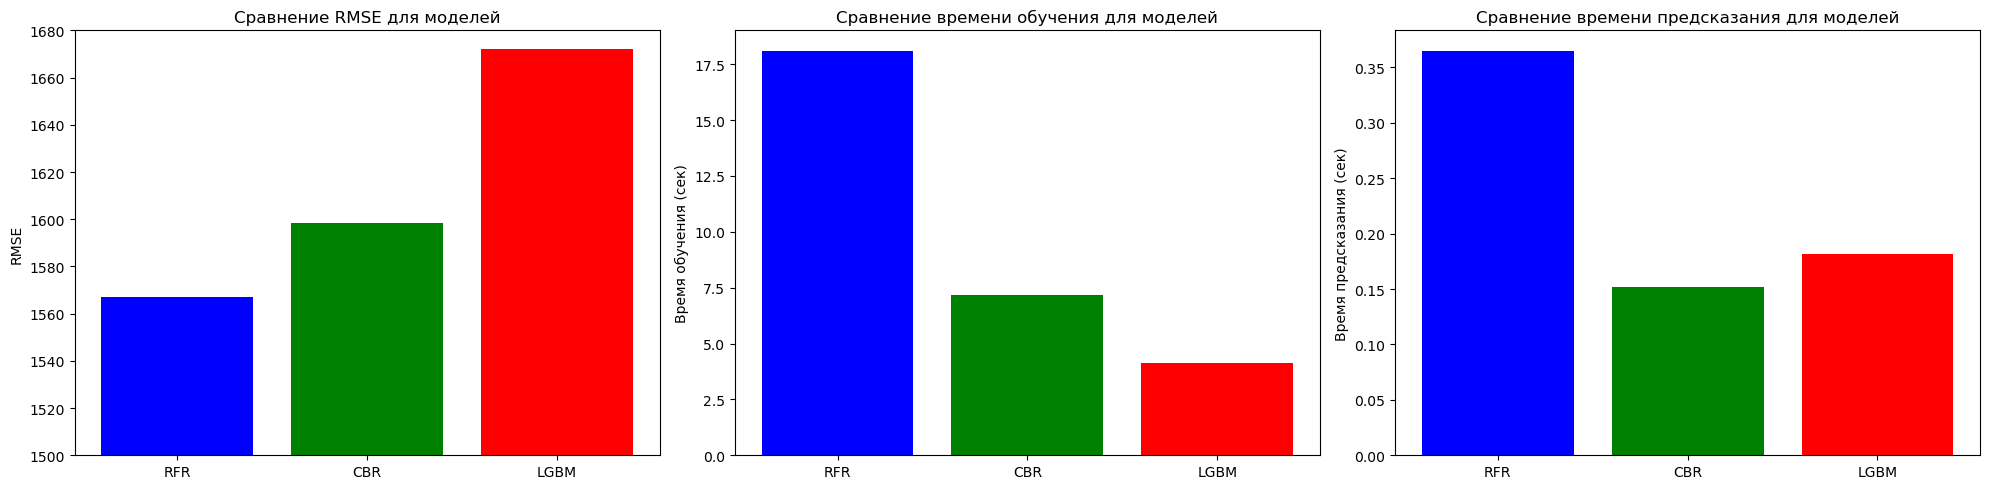

In [311]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 1 строка, 3 столбца

# Диаграмма для RMSE
axs[0].bar(data['model'], data['RMSE'], color=['blue', 'green', 'red'])
axs[0].set_ylim(1500, 1680)
axs[0].set_ylabel('RMSE')
axs[0].set_title('Сравнение RMSE для моделей')

# Диаграмма для времени обучения
axs[1].bar(data['model'], data['fitting_time'], color=['blue', 'green', 'red'])
axs[1].set_ylabel('Время обучения (сек)')
axs[1].set_title('Сравнение времени обучения для моделей')

# Диаграмма для времени предсказания
axs[2].bar(data['model'], data['predict_time'], color=['blue', 'green', 'red'])
axs[2].set_ylabel('Время предсказания (сек)')
axs[2].set_title('Сравнение времени предсказания для моделей')

plt.tight_layout()
plt.show()

Random Forest Regressor показала наилучший результат по RSME, но при этом в обучении в 2-3 раза дольше чем у градиеентного бустинга.
Если важна скорость то лучше выбрать CatBoost Regressor. Она немного дольше обучается чем LightGBM, но при этом показывает лучший результат.
Для дальнейшей работы возьмем CatBoost Regressor.

## Анализ моделей

### Анализ CatBoost Regressor

In [312]:
%%time
test_cbr_predict = final_cbr_fitted.predict(X_test_reworked)

CPU times: user 395 ms, sys: 10.6 ms, total: 405 ms
Wall time: 140 ms


In [313]:
test_cbr_rmse = mean_squared_error(y_test_reworked, test_cbr_predict) ** 0.5
print('CBR RMSE:', test_cbr_rmse)

CBR RMSE: 1593.4176174778306


Итоговый результат на тестовой выборке: RMSE = 1594

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

По этому блоку будет несколько важных замечаний:
1. Все модели этого блока оцениваются на тестовой выборке - это преждевременное решение, так как оценка на тестовой выборке - это финальное тестирование для лучшей модели, которая была отобрана в ходе промежуточного тестирования. Эта концепция находит своё отражение в условиях эксплуатации модели в реальной среде: в промышленной эксплуатации не работает несколько моделей одновременно - в промышленную эксплуатацию запускают только одну модель, которая была выбрана из нескольких в ходе промежуточной оценки. Так же и здесь - тестовая выборка имитирует поток реальных данных, и с этим потоком должна работать только одна модель. 


2. Лучшая модель должна быть выбрана по двум критериям - метрика `RMSE` и время работы модели. Далее сценарий работы с моделями в этом блоке зависит от выбранной стратегии валидации и оптимизации гиперпараметров:
- для оптимизации гиперпараметров и промежуточной оценки моделей была выделена валидационная выборка;
- для оптимизации гиперпараметров и промежуточной оценки моделей проводится кросс-валидация.
    
    В первом случае метрика промежуточной оценки модели - это метрика `RMSE` на валидационной выборке, полученная от использования на `valid` лучшей модели, а время - это время обучения модели с лучшими гиперпарметрами на `train` и время совершения ею предсказаний на `valid`.
    
    Во втором случае метрика промежуточной оценким модели - это метрика `RMSE` с кросс-валидации: в случае использования `cross_val_score` - это среднее из массива метрик (длина соответствует количеству фолдов для кросс-валидации), который возвращает инструмент, в случае использования `GridSearchCV` или `RandomizedSearchCV` - это метрика из атрибута `best_score_`. Временем работы лучшей модели может быть время обучения на `train` и время предсказания на `train` выборке (только время, метрика `RMSE` на тренировочной выборке не нужна).
    
    Тут часто студенты делают ошибку, принимая в качестве метрики времени время работы лучшей модели, а время оптимизации гиперпараметров в целом (то есть время выполнения всей ячейки кода цикла с `cross_val_score` или ячейки с `GridSearchCV`) - это некорректный подход: на практике модель не будет каждый раз переобучаться и выполнять оптимизацию гиперпараметров перед очередным предсказанием - сначала будет найдена лучшая модель, а она уже будет использоваться для обучения и предсказаний. Поэтому и в этом случае сначала определяется лучшая модель, а уже потом замеряется время её работы: кросс-валидации как альтернатива времени обучения и предсказания (потому что по сути кросс-валидация объединяет в себе обучение и предсказание) или время обучения и предсказания на `train`.
    
    Независимо от выбранной стратегии кросс-валидации алгоритм работы выглядит как:
- оптимизация гиперпараметров и поиск лучшей модели;
- оценка метрики `RMSE`;
- оценка времени работы лучшей модели: на валидационной выборке (если она выделялась) или на кросс-валидации/тренировочной выборке (если проводилась кросс-валидация).
    
    По итогу нужно будет провести сравнительную характеристику моделей по критериям метрики `RMSE` и времени работы моделей и выбрать лучшую - именно эта лучшая модель должна будет оцениваться на тестовой выборке.
    
3. Очень важно также проверить лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу - вдруг окажется, что не было бы большого смысла заниматься созданием новых признаков, тюнингом и кросс-валидацией моделей, если можно было бы просто предсказывать среднее значение тренировочной выборки? 
    
    В качестве константной модели можно использовать `DummyRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) -  эта модель как раз создана для генерирования константных предсказаний.
    
    Важно, чтобы результат тестирования нашей модели на тествой выборке был лучше, чем результат константной модели - в противном случае наша модель является бесполезной, так как все наши усилия над проектом не принесли результата, а можель, просто предсказывющая среднее на `train`, делает нашу работу лучше.


4. Итоговый вывод нужно поправить.

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Сергей, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.

Работа с моделями также выполнена отлично: исследовано несколько алгоритмов, проведён подбор гиперпараметров с помощью `RandomizedSearchCV`, выполнена промежуточная оценка моделей на кросс-валидации - молодец! Круто, что используешь сочетание `ColumnTransformer` и `Pipeline` для соединения разных инструментов в единый объект, а также пробуешь в работе разные трансформеры.
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)